In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gini(p):
    return p * (1-p) + (1-p)*(1-(1-p))

In [4]:
def entropy(p):
    return - p * np.log2(p) - (1-p) * np.log2(1-p)

In [5]:
def error(p):
    return 1 - np.max([p, 1-p])

In [6]:
x = np.arange(0.0, 1.0, 0.01)

In [7]:
ent = [entropy(p) if p != 0 else None for p in x]

In [8]:
scaled_ent = [0.5*en if en else None for en in ent]

In [10]:
err = [error(i) for i in x]

Text(0, 0.5, 'impurity index')

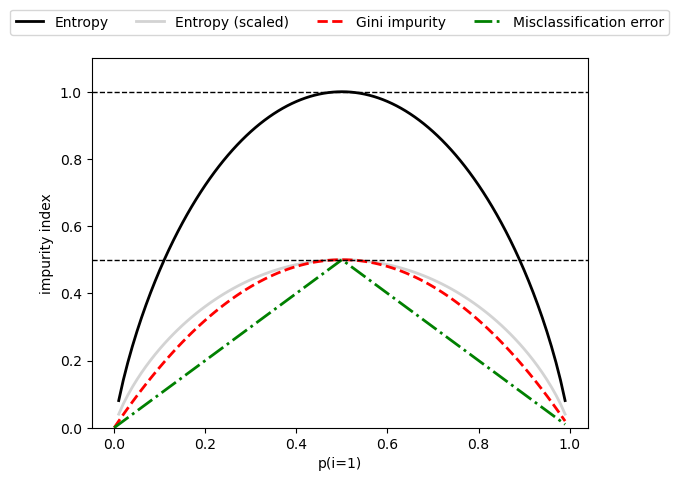

In [13]:
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, scaled_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)','Gini impurity','Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')

In [3]:
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:,0]>0, x_xor[:,1]>0)
y_xor = np.where(y_xor, 1, -1)

In [15]:
# using sklearn decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=4)
dtree.fit(x_xor, y_xor)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [4]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

/tmp/ipykernel_12254/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


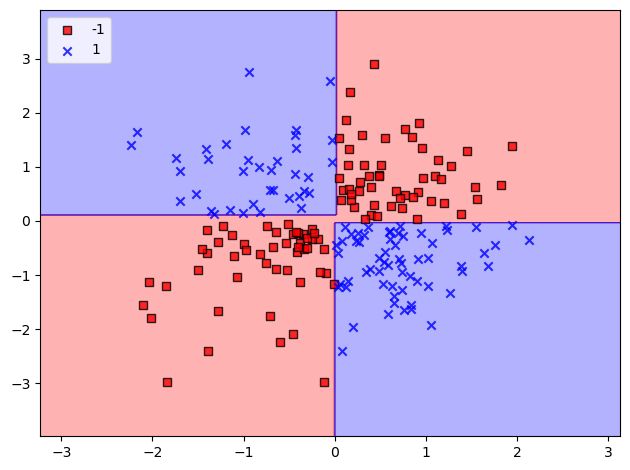

In [19]:
plot_decision_regions(x_xor, y_xor,classifier=dtree)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

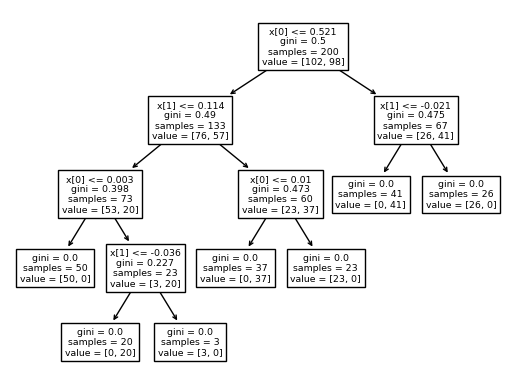

In [20]:
from sklearn import tree

tree.plot_tree(dtree)

plt.show()

In [21]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dtree, filled=True, rounded=True, out_file=None)

In [22]:
graph = graph_from_dot_data(dot_data)

In [24]:
graph.write_png('tree.png')

True

In [25]:
# using random forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)

/tmp/ipykernel_12254/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


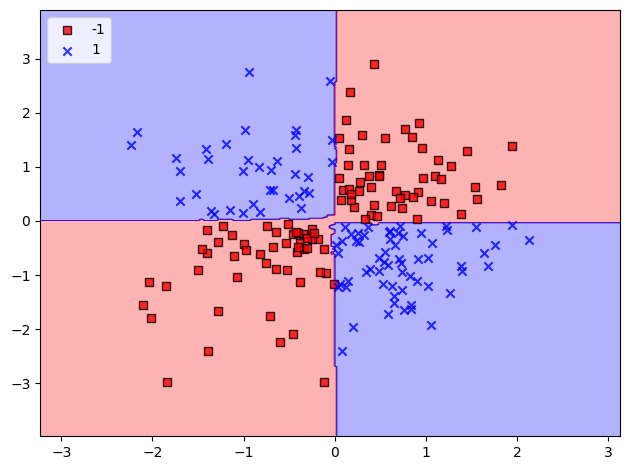

In [26]:
forest.fit(x_xor, y_xor)

plot_decision_regions(x_xor, y_xor,classifier=forest)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
# KNN classification

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [5]:
knn.fit(x_xor, y_xor)

KNeighborsClassifier()

/tmp/ipykernel_10211/2573366654.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


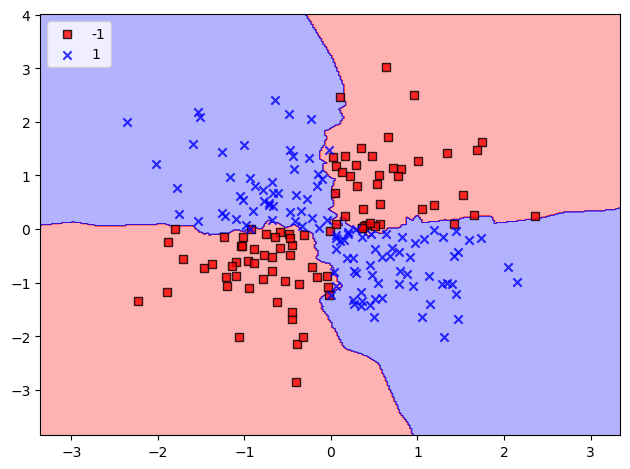

In [6]:
plot_decision_regions(x_xor, y_xor, classifier=knn)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()